In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

Using TensorFlow backend.


In [2]:
model = keras.models.load_model('./TrainedModels/generator_model_200.h5', compile= False)
model2 = keras.models.load_model('./TrainedModels/generator_model_200_2.h5', compile= False)

In [3]:
def plotter(model, n_samples=49):
    pnts = []
    plt.figure(figsize=(18,9))
    for i in range(n_samples):
        ran = np.random.randn(n_samples, 100)
        sqrt = int(np.sqrt(n_samples))
        plt.subplot(sqrt, sqrt, i+1)
        X = model.predict(ran)
        pnts.append(ran)
        X = (X + 1) / 2.0
        plt.imshow(X[0])
        plt.axis('off')
    plt.show()
    return pnts

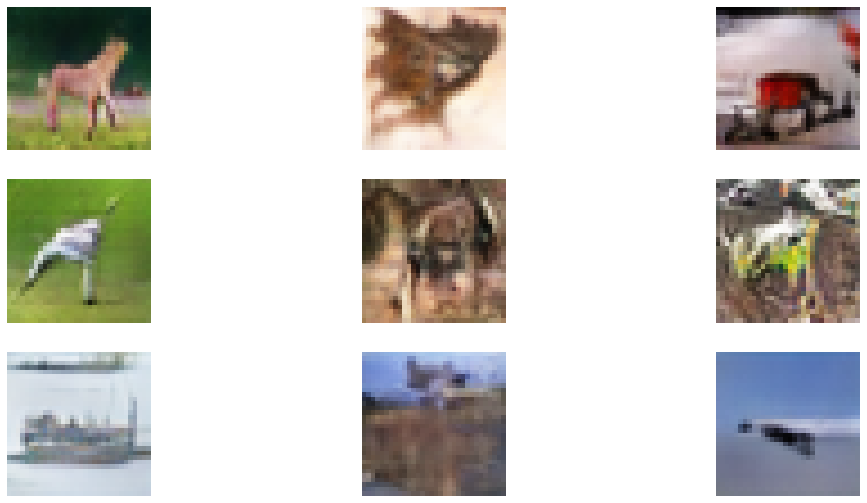

In [61]:
pnts = plotter(model, n_samples= 9)

In [62]:
pnts = np.array(pnts)
p0 = np.array(pnts[0])
p1 = np.array(pnts[3])

In [63]:
def create_movie(model, p0, p1, n= 100):
    interp = np.linspace(p0, p1, num= n)
    
    for i in range(n):
        x_inp = interp[i]
        X = (model.predict(x_inp)[0] + 1) / 2.0
        X = np.uint8(255 * X)
        X = cv2.pyrUp(X)
        plt.imshow(X)
        plt.axis('off')
        if i<10:
            filename = f'./Transition/00{i}.png'
        elif i<100:
            filename = f'./Transition/0{i}.png'
        else:
            filename = f'./Transition/{i}.png'
        plt.savefig(filename)
    plt.close()

In [65]:
create_movie(model= model, p0= p0, p1= p1, n= 300)

In [67]:
import cv2
import numpy as np
import os
from os.path import isfile, join
pathIn= './Transition/'
pathOut = 'video2.avi'
fps = 30
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

files.sort(key = lambda x: x[5:-4])
for i in range(len(files)):
    filename=pathIn + files[i]
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    frame_array.append(img)
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    out.write(frame_array[i])
out.release()